# Project 1

Project consisting of results of integrals of sin in one and multiple dimensions.

## Calcualting Integrals

When calculating integrals, one have two choices - calculate it analytically, or calculate it numerically. Analytical calculations are exact, but calculating integrals of complicated functions in multiple dimensions can be tricky. That's when the numerical calculations come in to play.

To calculate an integral basically means to find the **area under the curve**. This can be done in many different ways. The one I will be implementing today are:

## Trapezoidal rule

The trapezoidal rule works by approximating the region under the graph of the function f ( x ) as a trapezoid and calculating its area. It follows that 

# $$I = \int_{a}^{b} f(x) dx = (b-a)* \dfrac{1}{2}(f(a)+f(b))$$

This will approximate our integral using only two points, we can increase our accuracy, and decrease our error by partitioning the integration interval, and applying the formula multiple times.

Finally, for the uniform partition of the interval, we get:

###  $$ \Delta{x} = \dfrac{b-a}{N}$$

Where N is the number of partitions.

### $$I = \int_{a}^{b} f(x) dx = \Delta{x}\biggl(\dfrac{ f(x_{N}) + f(x_{0} )} {2} + \sum_{k=1}^{N-1} f(x_{k})\biggr)$$

Here is the implementation of the formula above:

In [1]:
from math import sin, pi

In [2]:
def trapezoidal(a, b, N, function):
    delta_x = (b-a)/N
    xks = [ a + delta_x * i for i in range(1, N)]
    function_values = [ function(x) for x in xks]
    I = (function(a) + function(b)) / 2
    I = I + sum(function_values)
    I = I * delta_x
    return I

In [3]:
I = trapezoidal(0, pi, 100, sin)

In [4]:
print(f"Result obtained with the trapezoidal rule: {I}")

Result obtained with the trapezoidal rule: 1.9998355038874434


Analytical result of the above integral is exactly 2

## Midpoint Rule

In this method, we partition the integration interval into bins, calculate the function value in the middle of the bin, and add it to the result.

### $$I = \sum_{k=1}^{N-1} y\biggl( \dfrac{x_i + x_{i+1} }{ 2 } \biggr) \Delta{x}$$

Here is the implementation:

In [5]:
def midpoint(a, b, N, func):
    dX = (b-a)/N
    x_is = []
    xi = 0
    for x in range(N):
        x_is.append(xi)
        xi += dX

    sum = 0
    for i in range(0, N-1):
        sum += func( (x_is[i] + x_is[i+1])/2 )
    I = sum * dX
    return I

In [6]:
I = midpoint(0, pi, 100, sin)

In [7]:
print(f"Result obtained with the midpoint rule: {I}")

Result obtained with the midpoint rule: 1.9995887891442434


## The Monte Carlo method

Sometimes, especially in higher dimensions, using deterministic methods as Trapezoid or Midpoint is just not enough. That's where the Monte Carlo method come into play. In this method we sample arguments from the integration interval, calculate the mean value of their function values, and multiply by (b-a).

### $$I = \dfrac{b-a}{N} \sum_{i=0}^{N-1} y(x_i)$$

Here is the implementation

In [8]:
from random import uniform

In [9]:
def monteCarlo(a, b, N, func):
    y = 0
    for _ in range(N):
        x = uniform(a, b)
        y += func(x)
    I = (b-a) / N
    I = I * y
    return I

In [10]:
monteCarlo(0, pi, 100, sin)

2.0969346392751844

We can see that for the same N value as before, the result is more distant from the analytical result, compared to the previous methods.

In [11]:
monteCarlo(0, pi, 10_000, sin)

2.0082922609787115

## The error

Unfortunately, returning only the calculated result is not enough. For the result to be worth something, it has to include the error, which will show by how much the result can be off.

The formula for the standard error is this:

## $$ \sigma_{\bar{y}} = \dfrac{\sigma_y}{\sqrt{N}} =  \dfrac{1}{\sqrt{N}}\sqrt{\dfrac{1}{N-1}\sum_{i=0}^{N-1} (y(x_i) - \overline{y})^2}$$

## Monte Carlo error

In [12]:
from statistics import mean
from math import sqrt

In [13]:
def monteCarlo(a, b, N, func, error_return=False)->float:
    dX = (b-a) / N
    x_is = [uniform(0, pi) for _ in range(N)]
    sum = 0
    for xi in x_is:
        sum += func(xi)
    I = sum * dX
    if error_return:
        error = standardError(x_is, func)
        return I, error
    return I

def standardError(x_is, func)->float:
    y_is = [func(x) for x in x_is]
    y_dash = mean(y_is)
    N = len(x_is)
    sum = 0
    for yi in y_is:
        sum += (yi - y_dash) ** 2
    sum = sum / (N-1)
    sum = sqrt(sum)
    error = sum / sqrt(N)
    return error

In [14]:
monteCarlo(0, pi, 100, sin, True)

(1.8835608375286912, 0.03162610497585035)

## Convergence of these 3 methods

In [15]:
from matplotlib import pyplot as plt

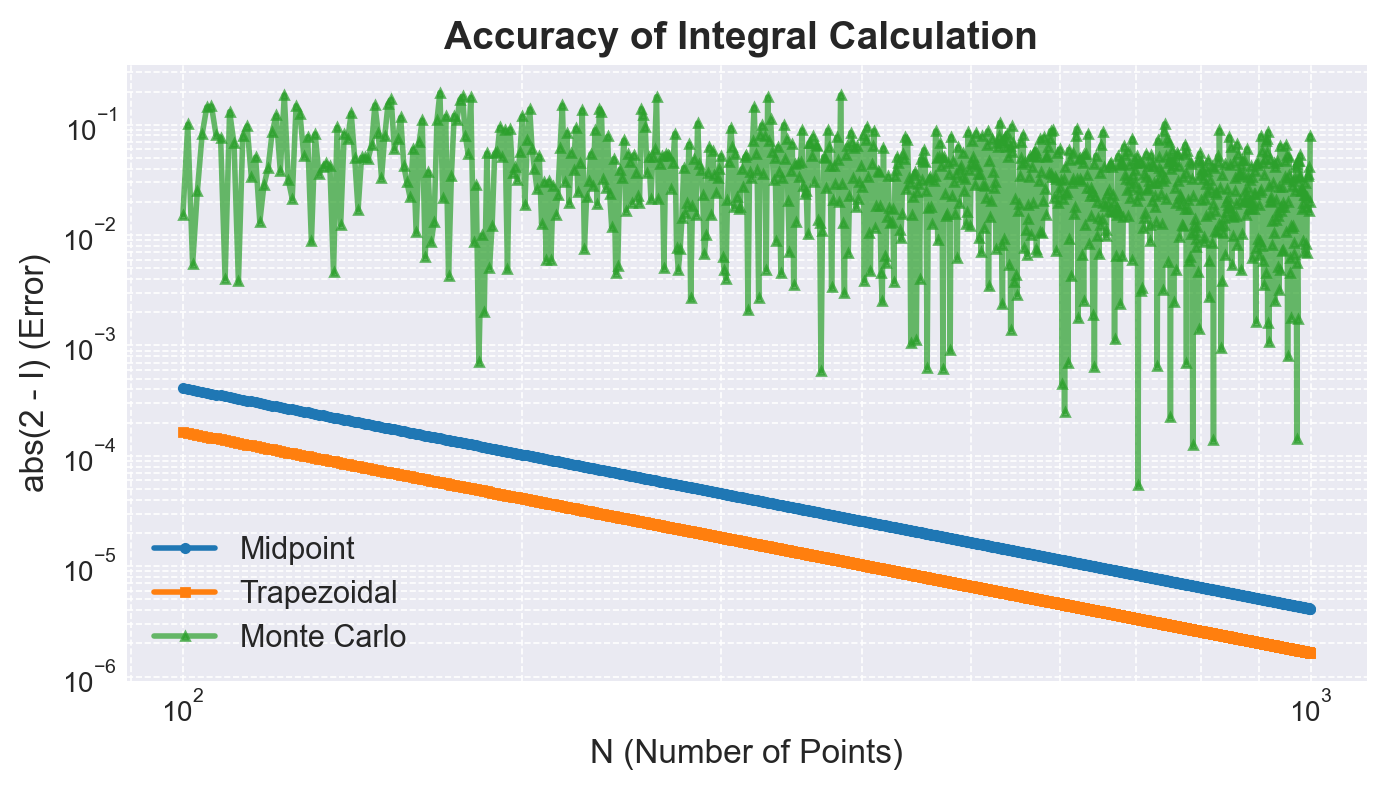

In [23]:
Is_mid = [abs(midpoint(0, pi, n, sin) - 2) for n in N_s]
Is_trap = [abs(trapezoidal(0, pi, n, sin) - 2) for n in N_s]
Is_mc = [abs(monteCarlo(0, pi, n, sin) - 2) for n in N_s]

# Plot settings
plt.figure(figsize=(8, 4), dpi=200)  # Larger figure, higher resolution
plt.style.use("seaborn-v0_8-darkgrid")  # Apply a clean style

plt.loglog(N_s, Is_mid, label="Midpoint", linewidth=2, marker="o", markersize=3)
plt.loglog(N_s, Is_trap, label="Trapezoidal", linewidth=2, marker="s", markersize=3)
plt.loglog(N_s, Is_mc, label="Monte Carlo", linewidth=2, marker="^", markersize=3, alpha=0.7)

# Labels and title
plt.title("Accuracy of Integral Calculation ", fontsize=14, fontweight="bold")
plt.xlabel("N (Number of Points)", fontsize=12)
plt.ylabel("abs(2 - I) (Error)", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, which="both", linestyle="--", linewidth=0.6)

plt.show()

As we can see above, the Monte Carlo method is outmatched, when it comes to converging, at least in one dimension.

# Multi dimensional integration

This is implementation of Monte Carlo method for D dimensions

In [27]:
from math import prod

In [30]:
def monteCarlo(a, b, N, func, dimensions):
    dX = ((b-a)**dimensions) / N
    y = 0
    for _ in range(N):
        xs = [uniform(a, b) for _ in range(dimensions)]
        ys = [func(x) for x in xs]
        y  += prod(ys)
    I = y * dX
    return I

In [46]:
dimensions = [1, 2, 3, 4, 5, 6, 10]

In [47]:
for dim in dimensions:
    I = monteCarlo(0, pi, 100, sin, dim)
    print(f"Numerical result: {I} \tAnalytical result: {2 ** dim}")

Numerical result: 2.0216939834746284 	Analytical result: 2
Numerical result: 3.5686813564846016 	Analytical result: 4
Numerical result: 9.260678444222895 	Analytical result: 8
Numerical result: 13.45052474338641 	Analytical result: 16
Numerical result: 29.88697606996823 	Analytical result: 32
Numerical result: 61.062457062194646 	Analytical result: 64
Numerical result: 767.6289914777205 	Analytical result: 1024


As we can observe, increasing number of dimensions, without incresing number of samples yields worse and worse results.